# **Exploratory Data Analysis**

**BY: Kajol Rafi, Emile Pascoe, Elliot Martin, Christian Durán**

_Big Data in Media Technology_

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## **Initial Data Exploration**

In [12]:
# Reading wine data from zipfile
zip_file_path = 'wine_reviews_user.zip'
extraction_directory = ''

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

df = pd.read_csv('wine_reviews_user.csv')

os.remove('wine_reviews_user.csv')

In [13]:
# Show top 5 records
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,"Rhone, France",Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,Spain,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,"Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgu...",Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99
3,Chateau Bouscaut 2020,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France",Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN
4,Brandini Barolo La Morra 2015,Nebbiolo,"Barolo, Piedmont, Italy",Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99


The main insight on the data with this visualization is that the origin value comes in different formats for each wine. Some wines have several values inside the origin columns, so data cleaning is needed in order to extract the data correctly. 

In [14]:
# Revising data types, amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432659 entries, 0 to 432658
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Name                430834 non-null  object 
 1   Variety             421041 non-null  object 
 2   Origin              421017 non-null  object 
 3   Attr_1              427541 non-null  object 
 4   Attr_2              78506 non-null   object 
 5   Alcohol_vol         430767 non-null  float64
 6   Alcohol_percentage  430767 non-null  float64
 7   Winemaker_notes     98427 non-null   object 
 8   Review              95748 non-null   object 
 9   Avg_rating          46547 non-null   float64
 10  N_ratings           46547 non-null   float64
 11  Price_Out-of-stock  430766 non-null  object 
 12  Price               91226 non-null   object 
dtypes: float64(4), object(9)
memory usage: 42.9+ MB


As it can be seen. Most of the wine pages does not have a winemaker note or a sommelier review. We can infer that this is due to the quality of the wine or they being a more commercial wine. For our prediction based on natural language we can consider only the records that do have the reviews present.

Further notice comes around when speaking about the Origin Column, nulls need to be droped in order to have it as a way to predict ratings.

Another observation is that the data types for Price_Out-of-stock and Price should be float 64, so more exploration on this columns needs to be done.

## **Data Cleaning**

### _Origin_

The main approach to clean this column is to split its data in different column. Starting by getting all the values into a list inside the same column and then create multiple columns for each origin value.

In [15]:
# Dropping Nulls
df2 = df.dropna(subset=['Origin'])

# Stripping end whitespace
df2['Origin'] = df2['Origin'].str.rstrip()

df2['Origin'].head()

0                                        Rhone, France
1                                                Spain
2    Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgu...
3                     Pessac-Leognan, Bordeaux, France
4                              Barolo, Piedmont, Italy
Name: Origin, dtype: object

Data is split by commas, so splitting by that character should work.

In [16]:
# Spliting data based on commas for the origin column
df3 = df2.copy()

df3['Origin_List'] = df2['Origin'].str.split(',').apply(lambda x : x[::-1])

df3['Origin_List'].head(5)

0                                     [ France, Rhone]
1                                              [Spain]
2    [ France,  Burgundy,  Cote d'Or,  Cote de Nuit...
3                 [ France,  Bordeaux, Pessac-Leognan]
4                          [ Italy,  Piedmont, Barolo]
Name: Origin_List, dtype: object

In [17]:
# Using the explode function from pandas in order to create different columns for each item in Origin_List
df4 = df3.copy()

# define a function to split the list into columns
def split_list(row):
    return pd.Series(row['Origin_List'])

# apply the function to the DataFrame
new_df4 = df4.apply(split_list, axis=1).rename(columns=lambda x: f"Origin_{x+1}")

# merge the new DataFrame with the original DataFrame
result_df4 = pd.concat([df4, new_df4], axis=1).drop(['Origin_List', 'Origin'], axis=1)

# Update the df3 dataframe
df4 = result_df4.copy()

df4.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN,France,Rhone,NaN,NaN,NaN
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN,Spain,NaN,NaN,NaN,NaN
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99,France,Burgundy,Cote d'Or,Cote de Nuits,Vosne-Romanee
3,Chateau Bouscaut 2020,Bordeaux Red Blends,Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN,France,Bordeaux,Pessac-Leognan,NaN,NaN
4,Brandini Barolo La Morra 2015,Nebbiolo,Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99,Italy,Piedmont,Barolo,NaN,NaN


In [18]:
# Stripping whitespaces in the origin columns
df5 = df4.copy()

for col in df4.columns[-5:]:
    df5[col] = df4[col].str.lstrip().str.rstrip()

df5.iloc[0]['Origin_1']

'France'

In [19]:
# Checking the unique values of origin_1 column
df5['Origin_1'].value_counts()

California            128087
France                 88550
Italy                  64589
Spain                  25602
Australia              18636
Washington             14608
Oregon                 13323
Argentina              11401
South Africa           10084
Chile                   9434
New Zealand             7790
Other U.S.              6468
Portugal                6373
Austria                 5415
Germany                 3403
Greece                  1768
Israel                  1755
Hungary                  790
Slovenia                 383
Canada                   380
Other                    346
Mexico                   294
Croatia                  242
Switzerland              225
South America            164
Turkey                   157
Country of Georgia       148
Lebanon                  129
Japan                    126
Uruguay                  123
England                   70
Moldova                   57
Macedonia (FYROM)         30
Armenia                   17
Brazil        

It cna be seen how Origin_1 corresponds to the country of production. There are some cleaning remaining due to the California / Other U.S. entries.

For this cases we consider that, as we are going to classify this column as country, it is important to change California to United States.

In [20]:
# Defining a function to clean us territories
def clean_country(row):
    row2 = row.copy()
    if row['Origin_1'] in ['California', 'Oregon', 'Washington']:
        for i in range(-5, 0, 1): # Loop to move the origin data 1 column
            if i < 0 and i+1 < 0:
                row.iloc[i+1] = row2.iloc[i]
        row.iloc[-5] = 'United States' # Replace the origin_1 column with United States
    elif row['Origin_1'] == 'Other U.S.':
        row['Origin_1'] = 'United States' # Change Other U.S. to United States
    elif row['Origin_1'] == 'Macedonia (FYROM)':
        row['Origin_1'] = 'Macedonia'
    return row

# Replacing values in the origin_1 column
df6 = df5.copy()

# Apply cleaning function and renaming columns
df6 = df6.apply(clean_country, axis=1).rename(columns={'Origin_1':'Country','Origin_2':'Region'})

df6[(df6['Country'] == 'United States')].head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Country,Region,Origin_3,Origin_4,Origin_5
6,Kiona Late Harvest Riesling 2015,Other Dessert,NaN,NaN,750.0,0.0,\nHoney and apricot aromas lead to honeysuckle...,NaN,5.0,5.0,15.99,NaN,United States,Washington,Columbia Valley,NaN,NaN
22,Mullan Road Cellars Columbia Valley Red 2013,Bordeaux Red Blends,Red Wine,NaN,750.0,0.0,NaN,NaN,5.0,8.0,42.99,NaN,United States,Washington,Columbia Valley,NaN,NaN
24,Patent Wines Cabernet Sauvignon 2020,Cabernet Sauvignon,Red Wine,NaN,750.0,14.2,"After 22 months in barrel, this wine has a ric...",This smallproduction gem aged in (75% new) Fre...,5.0,20.0,69.99,NaN,United States,California,Napa Valley,Oak Knoll District,NaN
26,The Debate Artalade Vineyard Cabernet Sauvigno...,Cabernet Sauvignon,Red Wine,Boutique,750.0,14.8,Blend: 100% Cabernet Sauvignon,Refined tannin and integrated fruit mark this ...,5.0,15.0,609.99,NaN,United States,California,Napa Valley,NaN,NaN
28,The Naked Grape California Moscato,Muscat,White Wine,NaN,750.0,0.0,NaN,NaN,5.0,6.0,4.99,NaN,United States,California,NaN,NaN,NaN


In [21]:
# Verify if there are any repeated regions amongst Region and Origin 3
temp1 = pd.DataFrame(df6['Region'].value_counts().sort_index()).rename(columns={'Region':'Counts'})

temp2 = pd.DataFrame(df6['Origin_3'].value_counts().sort_index()).rename(columns={'Origin_3':'Counts'})

temp3 = temp1.join(temp2, how='inner', lsuffix='_1', rsuffix='_2')

temp3.shape[0]

0

In [22]:
# Rename the columns accordingly to their content and dropping unneccessary ones
df7 = df6.copy()

df7 = df6.drop(['Origin_4', 'Origin_5'], axis=1).rename(columns={'Origin_3':'Zone'})

df7.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Country,Region,Zone
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN,France,Rhone,NaN
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN,Spain,NaN,NaN
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99,France,Burgundy,Cote d'Or
3,Chateau Bouscaut 2020,Bordeaux Red Blends,Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN,France,Bordeaux,Pessac-Leognan
4,Brandini Barolo La Morra 2015,Nebbiolo,Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99,Italy,Piedmont,Barolo


### _Price and Price_Out-of-stock_

In [23]:
# Starting with changing the object columns to float64 datatype
df8 = df7.copy()

df8['Price_Out-of-stock'] = pd.to_numeric(df7['Price_Out-of-stock'].str.replace('$', ''), errors='coerce')
df8['Price'] = pd.to_numeric(df7['Price'].str.replace('$', ''), errors='coerce')
num_columns = df8.select_dtypes(exclude=['object']).columns.tolist()

df8[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421017 entries, 0 to 432658
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Alcohol_vol         420952 non-null  float64
 1   Alcohol_percentage  420952 non-null  float64
 2   Avg_rating          45970 non-null   float64
 3   N_ratings           45970 non-null   float64
 4   Price_Out-of-stock  419560 non-null  float64
 5   Price               88702 non-null   float64
dtypes: float64(6)
memory usage: 22.5 MB


In [24]:
# Checking missing values
for col in num_columns:
    missing_vals = df8[col].isnull().sum()
    percentage = np.round(missing_vals/df6.shape[0], decimals=4)*100
    print(f'Missing values for {col}: {missing_vals} ({percentage}%)')

Missing values for Alcohol_vol: 65 (0.02%)
Missing values for Alcohol_percentage: 65 (0.02%)
Missing values for Avg_rating: 375047 (89.08%)
Missing values for N_ratings: 375047 (89.08%)
Missing values for Price_Out-of-stock: 1457 (0.35000000000000003%)
Missing values for Price: 332315 (78.93%)


We can see that there are over $70 \% $ missing values in the following columns: 

* Avg_rating: $89.08\%$
* N_ratings: $89.08\%$
* Price: $78.93\%$

We need to tackle this with either imputation, dropping these columns, or maybe add a missingness indicator column for each of these columns.

In regards to the Price columns there is an issue we need to discuss before making any transformations to the data. First of all, some wines are not available to buy on the website, so they don't have a Price value, but they do have a Price_Out-of-stock value. In this case, we can create a different feature in order to solve the huge number of null values for the Price columns

In [25]:
# Creating a new feature called Price_Feature considering Price if available, if not use Price_Out-of-stock
def get_price_feature(row):
    if np.isnan(row['Price']):
        row['Price_Feature'] = row['Price_Out-of-stock']
    else:
        row['Price_Feature'] = row['Price']
    row.drop(['Price', 'Price_Out-of-stock'])
    return row

df9 = df8.copy()

df9 = df9.apply(get_price_feature, axis=1)

df9.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Country,Region,Zone,Price_Feature
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN,France,Rhone,NaN,49.99
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN,Spain,NaN,NaN,10.99
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99,France,Burgundy,Cote d'Or,119.99
3,Chateau Bouscaut 2020,Bordeaux Red Blends,Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN,France,Bordeaux,Pessac-Leognan,44.99
4,Brandini Barolo La Morra 2015,Nebbiolo,Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99,Italy,Piedmont,Barolo,63.99


In [26]:
# Checking the null values now that the Price_Feature was created
df9 = df9.drop(['Price', 'Price_Out-of-stock'], axis=1)

(df9.shape[0] - df9['Price_Feature'].isnull().sum()) / df9.shape[0]

0.9966509665880475

**_99.6%_ of records now have a Price Feature**, solving the problem of the huge amount of null values. This way is plausible to approach the problem due to the fact that Price tags aren't available if the wine is out-of-stock, but that doesn't mean that that particular wine doesn't have price.

### _Year_

In [27]:
# Extracting the year of the wine from its name
df10 = df9.copy()

# Extracting the 
df10['Year'] = df9['Name'].str.findall(' ([1-9]\d{3})').apply(lambda x : np.nan if len(x) == 0 else x[-1]).str.lstrip()
df10['Year'] = pd.to_numeric(df10['Year'], errors='coerce')

# Replacing the numbers that do not correspond to a year
df10['Year'] = np.where(df10['Year'] < 1800, np.nan, df10['Year'])

# Changing the data type to integer
df10['Year'] = df10['Year'].astype('Int64')

# Stripping the year from the name column
df10['Name'] = df9['Name'].str.replace(r'\b\d{4}\b|\b\d{2}\b', '').str.rstrip()

# Check the number of nulls in this new column
(df10.shape[0] - df10['Year'].isnull().sum()) / df10.shape[0]

0.9930192842569302

**_99.2%_ of records now have a Year in its name**, taking this into account we can use this as a new feature.

### _Rewiew_

In [28]:
df10['Review'].head()

0                                                  NaN
1                                                  NaN
2    Toasty, spicy aromas introduce this rich, silk...
3    This estate continues to produce brilliant win...
4    Aromas of cherries, strawberries and tar with ...
Name: Review, dtype: object

It is easy to see how there are some reviews that contain a "COMMENTARY: " text before the actual review text, so we need to strip this text with an empty space. And while we are at it we can also rstrip() the text to avoid any leftover whitespaces at the end of the text from the web scrapping process.

In [29]:
# Replacing "COMMENTARY: " with an empty space
df11 = df10.copy()

df11['Review'] = df10['Review'].str.replace('COMMENTARY: ', '').str.rstrip()

df11['Review'].head()

0                                                  NaN
1                                                  NaN
2    Toasty, spicy aromas introduce this rich, silk...
3    This estate continues to produce brilliant win...
4    Aromas of cherries, strawberries and tar with ...
Name: Review, dtype: object

In [30]:
# Reorder the columns
wine_reviews = df11[['Name', 'Variety', 'Country', 'Region', 'Zone', 'Attr_1', 'Attr_2', 'Winemaker_notes', 'Review',
                    'Alcohol_percentage', 'Alcohol_vol', 'Avg_rating', 'N_ratings', 'Price_Feature', 'Year']]

wine_reviews.head()

,Name,Variety,Country,Region,Zone,Attr_1,Attr_2,Winemaker_notes,Review,Alcohol_percentage,Alcohol_vol,Avg_rating,N_ratings,Price_Feature,Year
0,M. Chapoutier La Combe Pilate Esteban Brut Nature,Vintage Sparkling Wine,France,Rhone,NaN,Sparkling & Champagne,Green Wine,NaN,NaN,10.0,750.0,5.0,15.0,49.99,2020
1,Vinos de Arganza Alvarez de Toledo Godello,Godello,Spain,NaN,NaN,White Wine,NaN,This wine has a bright yellow color with fresh...,NaN,0.0,750.0,5.0,13.0,10.99,2020
2,Louis Latour Vosne-Romanee,Pinot Noir,France,Burgundy,Cote d'Or,Red Wine,Boutique,NaN,"Toasty, spicy aromas introduce this rich, silk...",0.0,750.0,5.0,20.0,119.99,2019
3,Chateau Bouscaut,Bordeaux Red Blends,France,Bordeaux,Pessac-Leognan,Red Wine,NaN,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,14.5,750.0,5.0,17.0,44.99,2020
4,Brandini Barolo La Morra,Nebbiolo,Italy,Piedmont,Barolo,Red Wine,Green Wine,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",14.0,750.0,5.0,19.0,63.99,2015


## **EDA**

### **_Numerical Columns_**

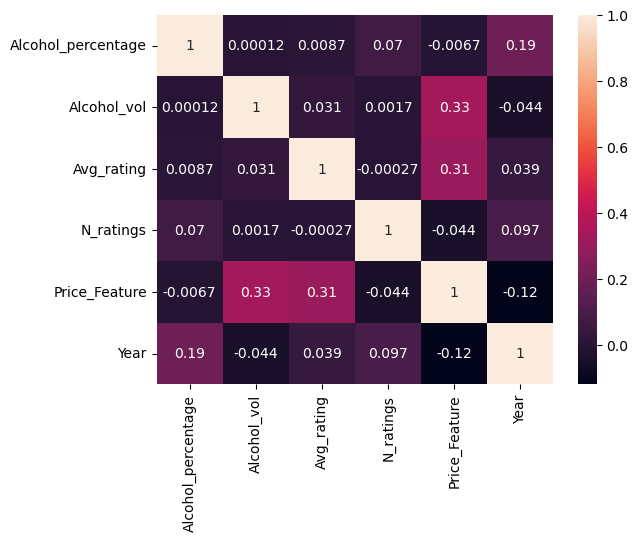

In [31]:
# Getting the new numerical columns
num_columns = wine_reviews.select_dtypes(exclude=['object']).columns.tolist()

# Check correlation between numerical columns
sns.heatmap(wine_reviews[num_columns].corr(), annot=True);

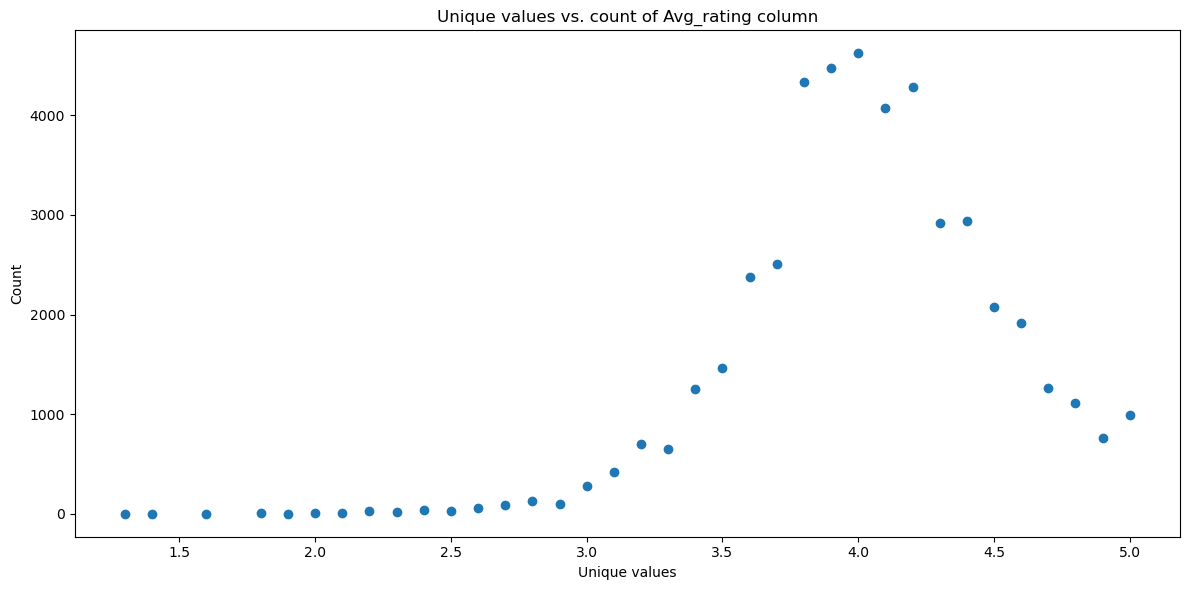

In [32]:
# If we're classifying based on the Avg_rating variable, it might be looking into the distribution of values
# Might need to 'bucket' values so we avoid it becoming a regression problem

vals = wine_reviews['Avg_rating'].value_counts()
vals_sorted =  vals.sort_index()

uniques = vals_sorted.index
count = vals_sorted.values

plt.figure(figsize=(12,6))
plt.scatter(uniques, count)
plt.xlabel("Unique values")
plt.ylabel("Count")
plt.title("Unique values vs. count of Avg_rating column")

plt.tight_layout()
plt.show()

### **_Categorical Columns_**

In [33]:
# Getting all categorical columns
cat_columns = wine_reviews.select_dtypes(include=['object']).columns.tolist()

wine_reviews[cat_columns].head()

,Name,Variety,Country,Region,Zone,Attr_1,Attr_2,Winemaker_notes,Review
0,M. Chapoutier La Combe Pilate Esteban Brut Nature,Vintage Sparkling Wine,France,Rhone,NaN,Sparkling & Champagne,Green Wine,NaN,NaN
1,Vinos de Arganza Alvarez de Toledo Godello,Godello,Spain,NaN,NaN,White Wine,NaN,This wine has a bright yellow color with fresh...,NaN
2,Louis Latour Vosne-Romanee,Pinot Noir,France,Burgundy,Cote d'Or,Red Wine,Boutique,NaN,"Toasty, spicy aromas introduce this rich, silk..."
3,Chateau Bouscaut,Bordeaux Red Blends,France,Bordeaux,Pessac-Leognan,Red Wine,NaN,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...
4,Brandini Barolo La Morra,Nebbiolo,Italy,Piedmont,Barolo,Red Wine,Green Wine,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ..."


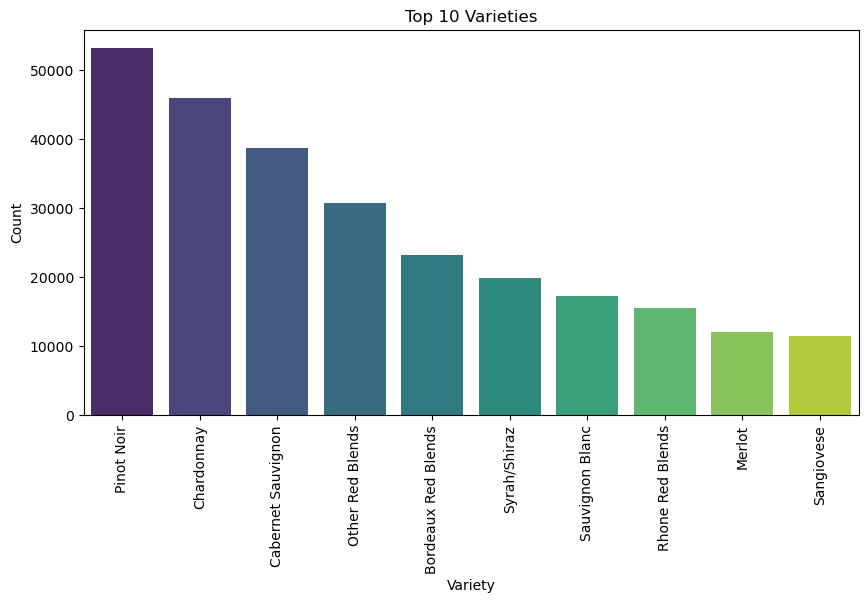

In [34]:
# Obtaining the top 10 varieties
top10_var = wine_reviews.groupby('Variety').agg({'Name':'count'}).rename(columns={'Name':'Count'}).sort_values('Count', ascending=False).head(10)

# Creating a bar chart
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Varieties')
sns.barplot(x=top10_var.index, y=top10_var['Count'], palette='viridis');

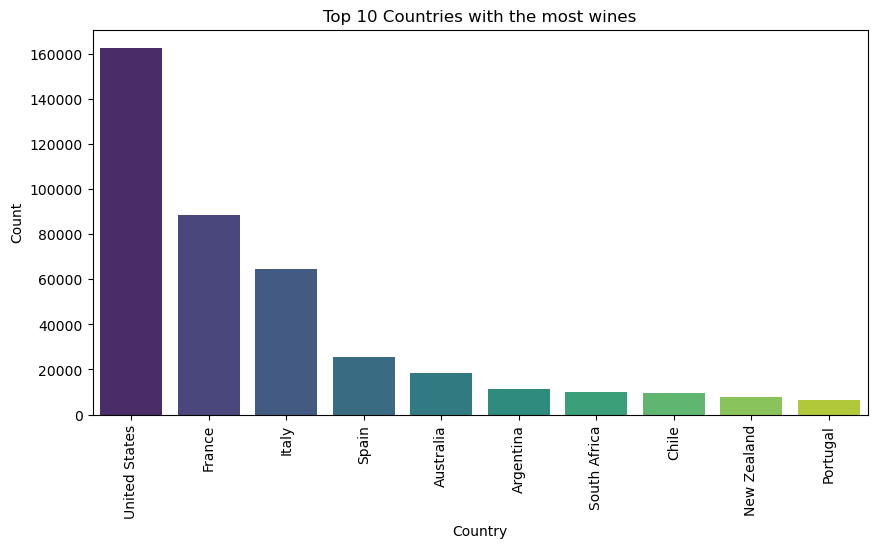

In [35]:
# Obtaining the top 10 countries
top10_con = wine_reviews.groupby('Country').agg({'Name':'count'}).rename(columns={'Name':'Count'}).sort_values('Count', ascending=False).head(10)

# Creating a bar chart
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Countries with the most wines')
sns.barplot(x=top10_con.index, y=top10_con['Count'], palette='viridis');

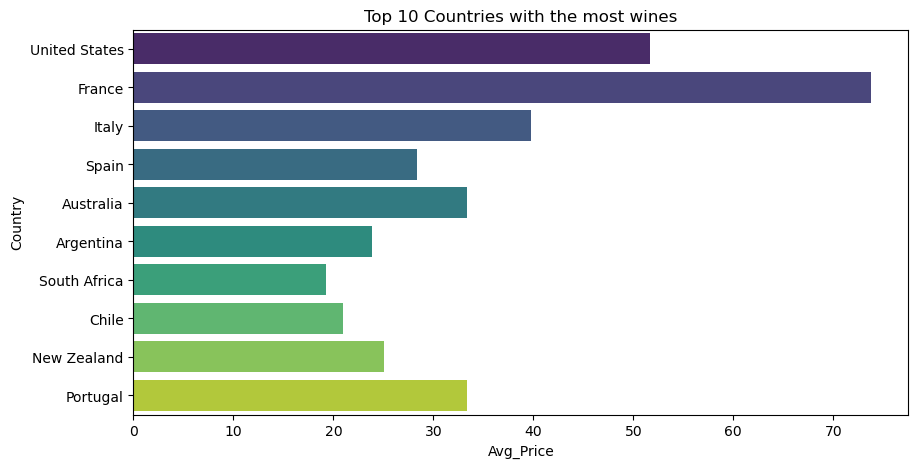

In [36]:
# Average price for the top 10 countries
avg_price_con = top10_con.join(wine_reviews.groupby('Country').agg({'Price_Feature':'mean'}), how='inner')\
    .rename(columns={'Price_Feature':'Avg_Price'})

# Creating a bar chart
plt.figure(figsize=(10,5))
plt.title('Top 10 Countries with the most wines')
ax = sns.barplot(y=avg_price_con.index, x=avg_price_con['Avg_Price'], palette='viridis', orient='h');

In [37]:
# Check the varieties most famuous in each top 10 country
wine_reviews.groupby('Country').describe(include='all').loc[top10_con.index]['Variety']

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,,,,,,,,,,,
United States,162486,114,Cabernet Sauvignon,30042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,88550,61,Pinot Noir,19698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy,64589,86,Sangiovese,10345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,25602,60,Tempranillo,8433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,18636,65,Syrah/Shiraz,5735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,11401,48,Malbec,4922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,10084,49,Sauvignon Blanc,1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,9434,38,Cabernet Sauvignon,2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Zealand,7790,40,Sauvignon Blanc,2697,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Dumping clean dataset into csv
wine_reviews.to_csv('wine_reviews_clean.csv', index=False)

In [39]:
wine_reviews.shape[0]

421017

In [43]:
# Dumping the clean dataset into a zip file
wine_reviews.to_csv('wine_reviews_clean.csv', index=False)

with zipfile.ZipFile('wine_reviews_clean.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('wine_reviews_clean.csv')

os.remove('wine_reviews_clean.csv')